# Scientific report: Acceptance and publication date analysis

I started analysing the acceptance and publication dates in the journal [Scientific Reports](http://www.nature.com/srep/) just as an python exercise. For instance, consider this [article](http://www.nature.com/articles/srep00001). 

Received: 10 February 2011<br>

Accepted: 01 March 2011<br>

Published online: 14 June 2011<br>

The dates for acceptance and publication can be calculated by 

No. of days to get accepted = Accepted date - Recieved date <br> 

No. of days to publish online after acceptance = Published online - Accepted date <br>

Total no. of days = Published online - Recieved date <br>

We save the fields for ~30000 articles (available here) : 

    1) DOI of the article
    2) Date_recieved, 
    3) Date_accepted, 
    4) Date_published,
    5) Year, 
    6) Time_taken_to_accept
    7) Time_taken_to_publish
    8) Total_time

In [1]:
#Let's view the file using ipython notebook as linux shell by using the below command.

!head -10 scientific_reports_analysis.txt

DOI, Date_recieved, Date_accepted, Date_published, Year, Time_taken_to_accept, Time_taken_to_publish, Total_time
doi:10.1038/srep00001,2011-02-10,2011-03-01,2011-06-14,2011,19,105,124 
doi:10.1038/srep00002,2011-01-12,2011-04-26,2011-06-14,2011,104,49,153 
doi:10.1038/srep00003,2011-03-07,2011-05-03,2011-06-14,2011,57,42,99 
doi:10.1038/srep00004,2011-01-20,2011-03-21,2011-06-14,2011,60,85,145 
doi:10.1038/srep00005,2011-01-19,2011-03-10,2011-06-14,2011,50,96,146 
doi:10.1038/srep00006,2011-01-20,2011-03-21,2011-06-14,2011,60,85,145 
doi:10.1038/srep00007,2011-03-03,2011-04-04,2011-06-14,2011,32,71,103 
doi:10.1038/srep00008,2011-03-14,2011-04-07,2011-06-14,2011,24,68,92 
doi:10.1038/srep00009,2011-02-25,2011-04-05,2011-06-14,2011,39,70,109 


In [2]:
import pandas as pd

data = pd.read_csv('scientific_reports_analysis.txt')

In [3]:
data.columns

Index([u'DOI', u' Date_recieved', u' Date_accepted', u' Date_published',
       u' Year', u' Time_taken_to_accept', u' Time_taken_to_publish',
       u' Total_time'],
      dtype='object')

In [4]:
#Strip the whitespace in the column header

data = data.rename(columns=lambda x: x.strip())

In [5]:
data.columns

Index([u'DOI', u'Date_recieved', u'Date_accepted', u'Date_published', u'Year',
       u'Time_taken_to_accept', u'Time_taken_to_publish', u'Total_time'],
      dtype='object')

In [6]:
#Count number of columns
data.DOI.count()

29356

In [7]:
#Selecting th required columns

acceptance = data[['DOI','Time_taken_to_accept']]

In [8]:
acceptance.head(5)

,DOI,Time_taken_to_accept
0,doi:10.1038/srep00001,19
1,doi:10.1038/srep00002,104
2,doi:10.1038/srep00003,57
3,doi:10.1038/srep00004,60
4,doi:10.1038/srep00005,50


In [9]:
#find maximum
acceptance.loc[acceptance['Time_taken_to_accept'].idxmax()]

DOI                     doi:10.1038/srep22960
Time_taken_to_accept                      877
Name: 22414, dtype: object

In [10]:
#Calculate year from days

877/365

2

"""

This is the arcile http://www.nature.com/articles/srep22960

It seems this journal approximately 2 years and 4 months to get accepted

"""

In [11]:
#find minimum day

acceptance.loc[acceptance['Time_taken_to_accept'].idxmin()]

DOI                     doi:10.1038/srep20442
Time_taken_to_accept                     -284
Name: 19978, dtype: object

ohh there is some error in the date. It showed a negative value. 
Let us check the article. 

This is the journal URL http://www.nature.com/articles/srep20442

Received: 15 October 2015 <br>

Accepted: 04 January 2015 <br>

Published online: 05 February 2016 <br>

There is a typo in the journal article. Accepted date should be 2016 instead of 2015. Either we can change the typo or we can remove the values that contains negative values. Let us check how many number of negative values here in the data "acceptance". <br>

In [12]:
#list the negative values of the column 

mask = acceptance.Time_taken_to_accept < 0

acceptance.Time_taken_to_accept[mask]

10374   -233
11328   -174
19978   -284
Name: Time_taken_to_accept, dtype: int64

In [13]:
#fetch the columns by index number

List = [10374, 11328,19978]
acceptance.ix[List]

,DOI,Time_taken_to_accept
10374,doi:10.1038/srep10611,-233
11328,doi:10.1038/srep11576,-174
19978,doi:10.1038/srep20442,-284


Let us check the full text of these articles

http://www.nature.com/articles/srep10611

Received: 10 December 2015
    
Accepted: 21 April 2015
    
Published online: 02 June 2015
    

http://www.nature.com/articles/srep11576

Received: 19 November 2015

Accepted: 29 May 2015

Published online: 23 June 2015
    

http://www.nature.com/articles/srep20442
    
Received: 15 October 2015
    
Accepted: 04 January 2015

Published online: 05 February 2016

There is a typo in the year for all three articles. For the sake of this analysis we can remove the three rows.

In [14]:
acceptance = acceptance.drop(acceptance.index[[10374, 11328,19978]])

In [15]:
#Count number of columns again
acceptance.DOI.count()

29353

In [16]:
#find minimum value

acceptance.loc[acceptance['Time_taken_to_accept'].idxmin()]

DOI                     doi:10.1038/srep01096
Time_taken_to_accept                        0
Name: 1076, dtype: object

Here is the full text [article](http://www.nature.com/articles/srep01096)

Received: 06 December 2012

Accepted: 06 December 2012

Published online: 21 January 2013

This article is accepted on the same day :))

In [17]:
#let us find the mean time to get acceptance

acceptance["Time_taken_to_accept"].mean()

119.27959663407488

In [18]:
import numpy as np
np.std(acceptance.Time_taken_to_accept)

64.37758213175188

In [19]:
import numpy as np
import matplotlib.pyplot as plt

/home/suresh/.software/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [20]:
acceptance.head(3)

,DOI,Time_taken_to_accept
0,doi:10.1038/srep00001,19
1,doi:10.1038/srep00002,104
2,doi:10.1038/srep00003,57


In [21]:
acceptance.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            29346, 29347, 29348, 29349, 29350, 29351, 29352, 29353, 29354,
            29355],
           dtype='int64', length=29353)

In [22]:
%matplotlib inline

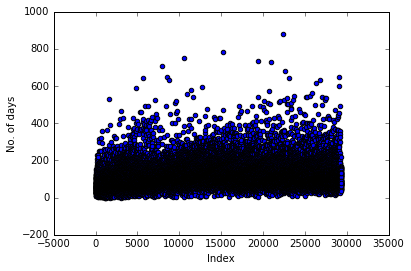

In [25]:
plt.scatter(acceptance.index, acceptance.Time_taken_to_accept)
plt.xlabel("Index")
plt.ylabel("No. of days")